In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
num_tasks = 50
head_hid_pairs = [(12, 384), (12, 24), (12,96), (2, 384), (6,384)]
lr_range = torch.linspace(np.log(3e-5), np.log(3e-3), steps=10).exp()

#lr = lr_range[task_id % 10]
#num_head, hid_dim = head_hid_pairs[task_id // 10]

num_steps = 500 # pretraining
num_epochs = 10 # fine tuning
eval_interval = 100
data = torch.load('../outputs/exp-1-2-0.pt', weights_only=False)
train_losses = torch.zeros(len(head_hid_pairs), len(lr_range), len(data['train_losses']))
eval_losses = torch.zeros(len(head_hid_pairs), len(lr_range), len(data['eval_losses']))

for task_id in range(num_tasks):
    data = torch.load(f'../outputs/exp-1-2-{task_id}.pt', weights_only=False)
    train_losses[task_id // 10, task_id % 10] = torch.tensor(data['train_losses'])
    eval_losses[task_id // 10, task_id % 10] = torch.tensor(data['eval_losses'])

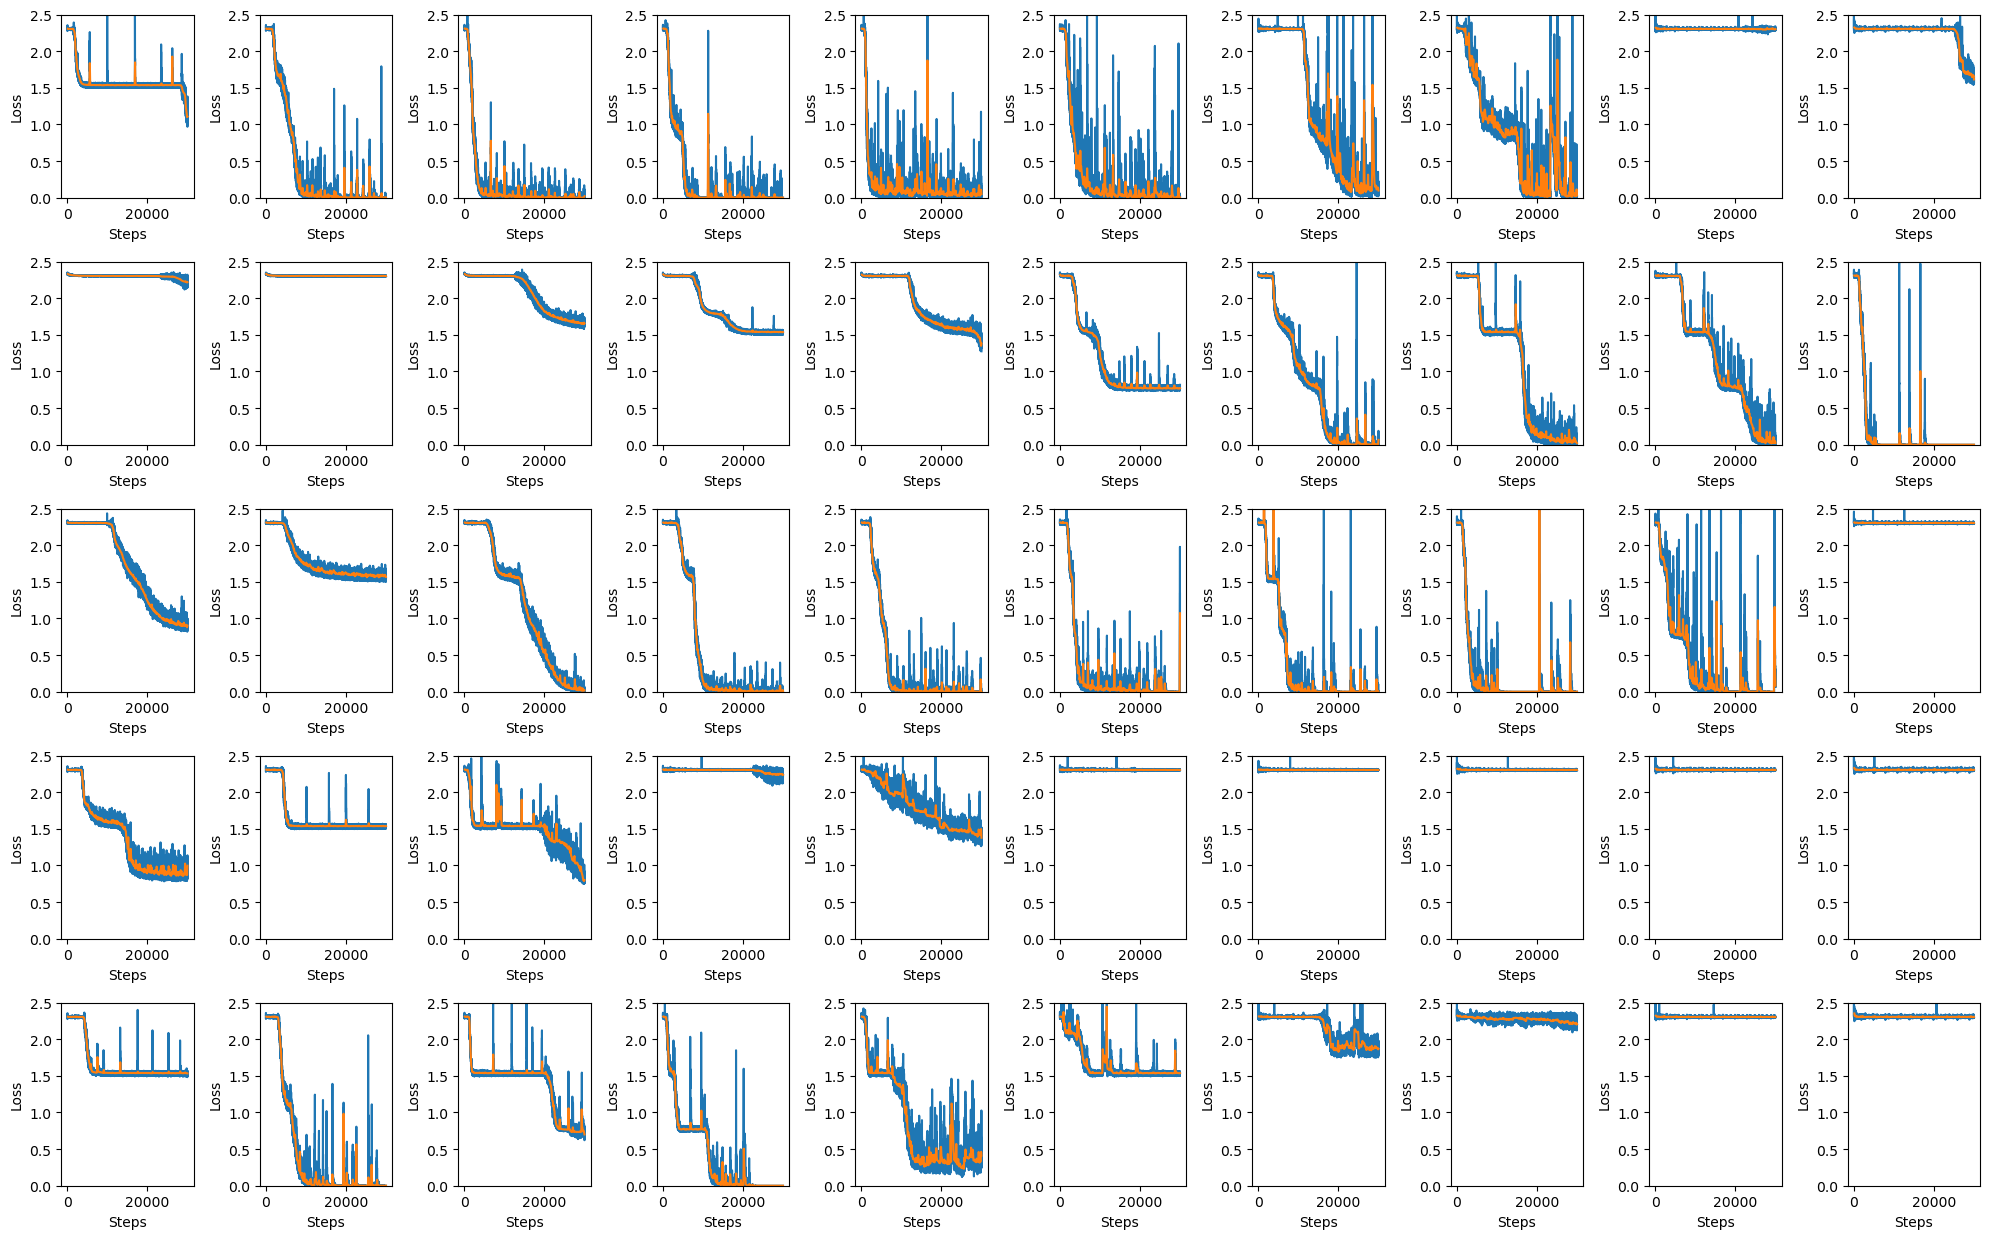

In [4]:
# 4 by 10 subplots
fig, axs = plt.subplots(5, 10, figsize=(20, 12.5))
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    for j, lr in enumerate(lr_range):
        ax = axs[i, j]
        ax.plot(range(1, train_losses.shape[2] + 1),train_losses[i, j].numpy())
        ax.plot(torch.arange(1, eval_losses.shape[2] + 1) * eval_interval, eval_losses[i, j].numpy())
        #ax.set_title(f'Heads: {num_head}, Hid: {hid_dim}, LR: {lr:.1e}')
        ax.set_xlabel('Steps')
        ax.set_ylabel('Loss')
        ax.set_ylim(0, 2.5)
plt.tight_layout()

In [5]:
head_dim = [hid_dim // num_head for num_head, hid_dim in head_hid_pairs]
eval_losses[0, -1, -1] = np.log(10)
eval_losses[0, -2, -1] = np.log(10)
eval_losses[0, -1, -2] = np.log(10)

Text(0, 0.5, 'Eval Loss')

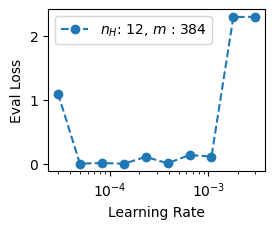

In [6]:
plt.figure(figsize=(2.8, 2.1))
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    plt.plot(lr_range.numpy(), eval_losses[i, :, -2].numpy(), 'o--', label=rf'$n_H$: {num_head}, $m$ : {hid_dim}')
    if i >= 0:
        break
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Eval Loss')

Text(0, 0.5, 'Eval Loss')

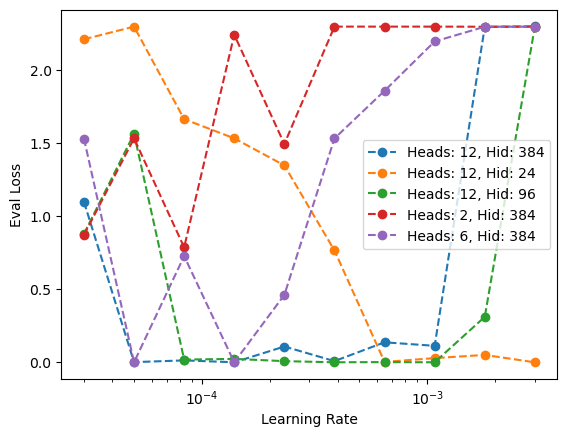

In [7]:
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    plt.plot(lr_range.numpy(), eval_losses[i, :, -2].numpy(), 'o--', label=f'Heads: {num_head}, Hid: {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Eval Loss')

Text(0, 0.5, 'Eval Loss')

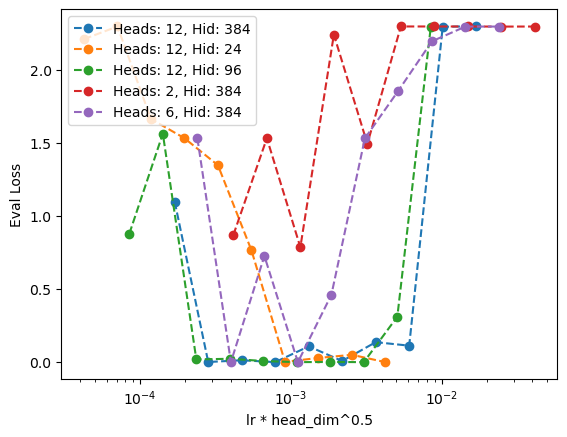

In [8]:
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    plt.plot(lr_range.numpy() * head_dim[i] ** 0.5, eval_losses[i, :, -2].numpy(), 'o--', label=f'Heads: {num_head}, Hid: {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('lr * head_dim^0.5')
plt.ylabel('Eval Loss')

Text(0, 0.5, 'Learned (0) or Not (1)')

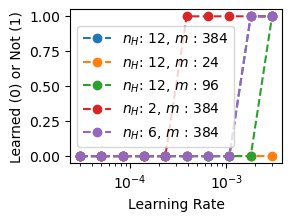

In [9]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    plt.plot(lr_range.numpy(), (eval_losses[i, :, -1].numpy() >= np.log(10)), 'o--', label=rf'$n_H$: {num_head}, $m$ : {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Learned (0) or Not (1)')

Text(0, 0.5, 'Learned (0) or Not (1)')

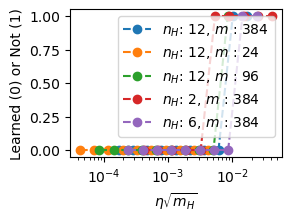

In [10]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
for i, (num_head, hid_dim) in enumerate(head_hid_pairs):
    plt.plot(lr_range.numpy() * head_dim[i] ** .5, (eval_losses[i, :, -1].numpy() >= np.log(10)), 'o--', label=rf'$n_H$: {num_head}, $m$ : {hid_dim}')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'$\eta \sqrt{m_H}$')
plt.ylabel('Learned (0) or Not (1)')

In [11]:
# partial L / partial angle is large, and because the norm is small, partial L / partial W is large, dW is norm times angle